**Pre-Processing**

In [1]:
# Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
import warnings
import pickle
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read Diamonds Dataset and print its shape
diamonds = pd.read_csv("diamond.csv")
diamonds

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,43892,3.54,60.8,57,2757,5.75,5.76,3.5
53936,53937,0.72,Good,D,SI1,35532,3.51,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.7,Very Good,D,SI1,32133,3.27,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,44248,4.03,61,58,2757,6.15,6.12,3.74


In [3]:
# Info of the Dataset
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

In [4]:
# Main Statistics of the Dataset
diamonds.describe()

,average us salary,number of diamonds mined (millions)
count,53940.000000,53940.000000
mean,39521.990100,2.902669
std,5486.892971,1.325985
min,30000.000000,0.600000
25%,34780.000000,1.750000
50%,39547.500000,2.910000
75%,44252.000000,4.050000
max,48999.000000,5.200000


In [5]:
# Printing the top 25 rows
diamonds.head(25)

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,44700,0.86,62.8,57,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,42939,1.68,62.3,57,336,3.95,3.98,2.47
7,8,FALSE,NaN,H,SI1,37587,4.62,MAYBE,MAYBE,NaN,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,30454,4.02,65.1,61,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,45506,1.20,59.4,61,338,4,4.05,2.39


In [6]:
# Removing unrelated columns
diamonds = diamonds.drop(columns=['Unnamed: 0'])

In [7]:
# convert object to numerical columns

def object_to_numeric(column):
    diamonds[column] = pd.to_numeric(diamonds[column], errors='coerce')

columns_to_convert = ['carat', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x', 'y', 'z']

for column in columns_to_convert:
    object_to_numeric(column)

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   carat                                51073 non-null  float64
 1   cut                                  52647 non-null  object 
 2   color                                52428 non-null  object 
 3   clarity                              53587 non-null  object 
 4   average us salary                    53940 non-null  int64  
 5   number of diamonds mined (millions)  53940 non-null  float64
 6   depth                                51866 non-null  float64
 7   table                                51030 non-null  float64
 8   price                                51844 non-null  float64
 9   x                                    51027 non-null  float64
 10  y                                    52208 non-null  float64
 11  z                           

In [8]:
# Standerdize Categorical Feature value
categorical_features = diamonds.select_dtypes(include = ['object']).columns.tolist()

def standerdizer(column_name):
    diamonds[column_name] = diamonds[column_name].str.upper()
    print("After Standerdizing: {0}".format(diamonds[column_name].unique()))

for feature in categorical_features:
    print("Before Standerdizing: {0}".format(diamonds[feature].unique()))
    standerdizer(feature)

Before Standerdizing: ['Ideal' 'Premium' 'Good' 'Very Good' nan 'Fair' 'PREMIUM' 'IDEAL' 'MAYBE'
 'FALSE' 'TRUE' 'premium' 'FAIR' 'ideal' 'very good' 'GOOD' 'VERY GOOD'
 'fair' 'good']
After Standerdizing: ['IDEAL' 'PREMIUM' 'GOOD' 'VERY GOOD' nan 'FAIR' 'MAYBE' 'FALSE' 'TRUE']
Before Standerdizing: ['E' 'I' 'J' 'H' 'F' 'G' 'D' nan 'MAYBE' 'f' 'h' 'TRUE' 'FALSE' 'g' 'j'
 'd' 'e' 'i']
After Standerdizing: ['E' 'I' 'J' 'H' 'F' 'G' 'D' nan 'MAYBE' 'TRUE' 'FALSE']
Before Standerdizing: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'MAYBE' 'FALSE' 'IF' nan 'si1'
 'vs2' 'TRUE' 'si2' 'vvs1' 'if' 'vvs2' 'vs1']
After Standerdizing: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'MAYBE' 'FALSE' 'IF' nan
 'TRUE']


In [9]:
# Printing the number of null values in each column

print("Number of null values in each feature:")
diamonds.isna().sum()

Number of null values in each feature:


carat                                  2867
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      2913
y                                      1732
z                                      2408
dtype: int64

In [10]:
# Extracting Features containing atleast one null value

null_features = []

def get_null_features():
    for index,value in diamonds.isna().sum().items():
        if(value > 0 and index not in null_features):
            null_features.append(index)
        elif(value == 0 and index in null_features):
            null_features.remove(index)

get_null_features()
print(null_features)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


In [11]:
# Replacing Categorical Data containing null vlaues with most repeated values as we have limited data

def nan_to_mode(column_name):
    diamonds[column_name].fillna(diamonds[column_name].mode()[0], inplace = True)

for feature in null_features:
    if(diamonds[feature].dtype == 'object'):
        print("There are Null values in feature: {0}. Hence replacing it with most repeated value".format(feature))
        nan_to_mode(feature)

There are Null values in feature: cut. Hence replacing it with most repeated value
There are Null values in feature: color. Hence replacing it with most repeated value
There are Null values in feature: clarity. Hence replacing it with most repeated value


In [12]:
# Printing the number of null values in each column

print("Number of null values in each feature:")
diamonds.isna().sum()

Number of null values in each feature:


carat                                  2867
cut                                       0
color                                     0
clarity                                   0
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      2913
y                                      1732
z                                      2408
dtype: int64

In [13]:
# updated null features
get_null_features()
print(null_features)

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [14]:
# Get the number of outliers for all non-categorical data and store features in a list

outlier_features = []

def get_outliers(column):
    # Calculating the IQR (Interquartile Range)
    top_25 = column.quantile(0.25)
    top_75 = column.quantile(0.75)
    IQR = top_75 - top_25
    # Define a lower and upper bound for outliers
    lower_bound = top_25 - 1.5 * IQR
    upper_bound = top_75 + 1.5 * IQR
    outliers = column[(column<lower_bound) | (column>upper_bound)]
    return outliers
print("Outliers in each feature Before cleaning:")
for column in null_features:
    outliers = get_outliers(diamonds[column])
    print(column,len(outliers))
    if (len(outliers) > 0):
        outlier_features.append(column)

Outliers in each feature Before cleaning:
carat 1779
depth 2440
table 568
price 3393
x 32
y 28
z 49


In [15]:
# Replacing the outliers using IQR technique

def remove_outliers(column_name):
    top_25 = diamonds[column_name].quantile(0.25)
    top_75 = diamonds[column_name].quantile(0.75)
    iqr = top_75 - top_25
    lower_bound = top_25 - 1.5 * iqr
    upper_bound = top_75 + 1.5 * iqr
    outliers = (diamonds[column_name] <= lower_bound) | (diamonds[column_name] >= upper_bound)
    diamonds.loc[outliers,column_name] = diamonds[column_name].median().astype(diamonds[column_name].dtype)

print("Outliers in each feature Afer cleaning-1:")
for feature in outlier_features:
    remove_outliers(feature)
    outliers = get_outliers(diamonds[feature])
    print(feature, len(outliers))

Outliers in each feature Afer cleaning-1:
carat 26
depth 1306
table 0
price 1853
x 0
y 0
z 0


In [16]:
# Deleting the outliers if the number of outliers are less than 5% of dataset size
def delete_outliers(column_name):
    top_25 = diamonds[column_name].quantile(0.25)
    top_75 = diamonds[column_name].quantile(0.75)
    iqr = top_75 - top_25
    lower_bound = top_25 - 1.5 * iqr
    upper_bound = top_75 + 1.5 * iqr
    outliers = (diamonds[column_name] <= lower_bound) | (diamonds[column_name] >= upper_bound)
    
    # Check if the number of outliers is less than 0.05 times the length of the DataFrame
    if outliers.sum() < 0.05 * len(diamonds[column_name]):
        # Delete rows containing outliers
        diamonds.drop(diamonds[outliers].index, inplace=True)

print("Outliers in each feature After cleaning-2:")
for feature in outlier_features:
    delete_outliers(feature)
    outliers = get_outliers(diamonds[feature])
    print(feature, len(outliers))

Outliers in each feature After cleaning-2:
carat 0
depth 0
table 0
price 696
x 0
y 0
z 0


In [17]:
# Updating remaning outliers with lower and upper bounds

def update_outliers(column_name):
    top_25 = diamonds[column_name].quantile(0.25)
    top_75 = diamonds[column_name].quantile(0.75)
    iqr = top_75 - top_25
    lower_bound = top_25 - 1.5 * iqr
    upper_bound = top_75 + 1.5 * iqr
    outliers = (diamonds[column_name] <= lower_bound) | (diamonds[column_name] >= upper_bound)

    if(outliers.sum() > 0):
    # Replace outlier values with lower or upper bounds
        diamonds[column_name] = diamonds[column_name].apply(
            lambda x: lower_bound if x <= lower_bound else (upper_bound if x >= upper_bound else x)
        )

print("Outliers in each feature After cleaning-3:")
for feature in outlier_features:
    update_outliers(feature)
    outliers = get_outliers(diamonds[feature])
    print(feature, len(outliers))


Outliers in each feature After cleaning-3:
carat 0
depth 0
table 0
price 0
x 0
y 0
z 0


In [18]:
# Printing the number of null values in each column

print("Number of null values in each feature:")
diamonds.isna().sum()

Number of null values in each feature:


carat                                  2762
cut                                       0
color                                     0
clarity                                   0
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2034
table                                  2810
price                                  2065
x                                      2815
y                                      1676
z                                      2335
dtype: int64

In [19]:
# updated null features
get_null_features()
print(null_features)

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [20]:
# Replacing Non-Categorical Data containing null vlaues with mean values
def nan_to_mean(column_name):
    diamonds[column_name].fillna(diamonds[column_name].mean(), inplace = True)
    
for feature in null_features:
    if(diamonds[feature].isna().sum() > 0):
        nan_to_mean(feature)

# Printing the number of null values in each column after cleaning non-categorical columns
print("Number of null values in each feature:")
diamonds.isna().sum()

Number of null values in each feature:


carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64

In [21]:
# updated null features
get_null_features()
print(null_features)

[]


In [22]:
# Diamonds dataset shape

diamonds.shape

(50793, 12)

In [23]:
# String to Categorical Conversion

categorical_features = diamonds.select_dtypes(include = ['object']).columns.tolist()

def cat_encoding(column_name):
    diamonds.loc[:,column_name] = diamonds[column_name].astype('category').cat.codes

for feature in categorical_features:
    cat_encoding(feature)

diamonds.head()

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,3,1,5,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,5,1,4,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,2,1,7,33517,3.85,61.8,57.0,327.0,4.05,4.07,2.31
3,0.29,5,6,8,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2,7,5,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75


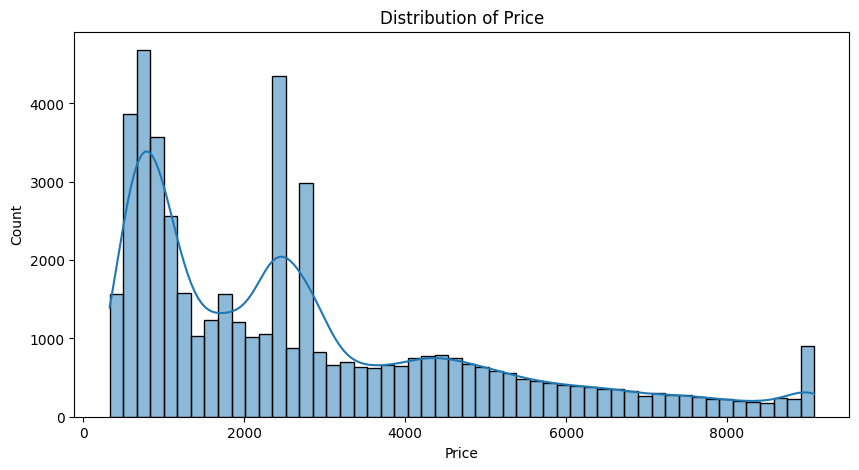

In [24]:
# Distribution of the 'price'
plt.figure(figsize=(10, 5))
sns.histplot(diamonds['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

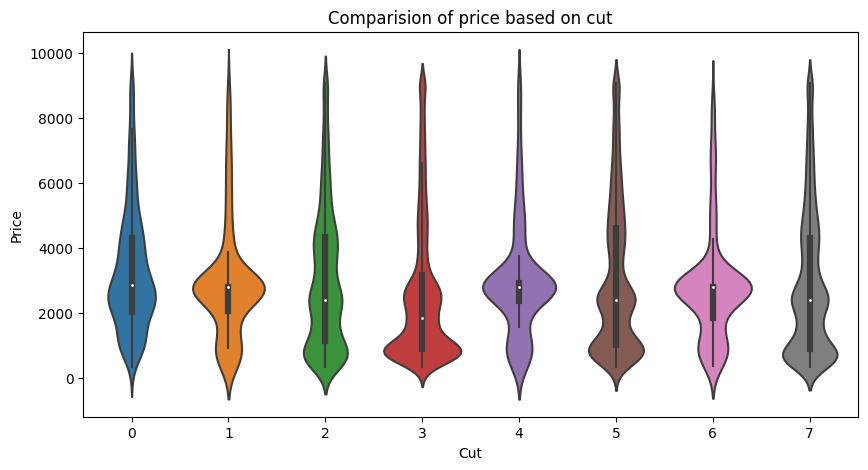

In [25]:
# Comparision of 'price' based on 'cut'
plt.figure(figsize=(10, 5))
sns.violinplot(x='cut', y='price', data=diamonds)
plt.title('Comparision of price based on cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

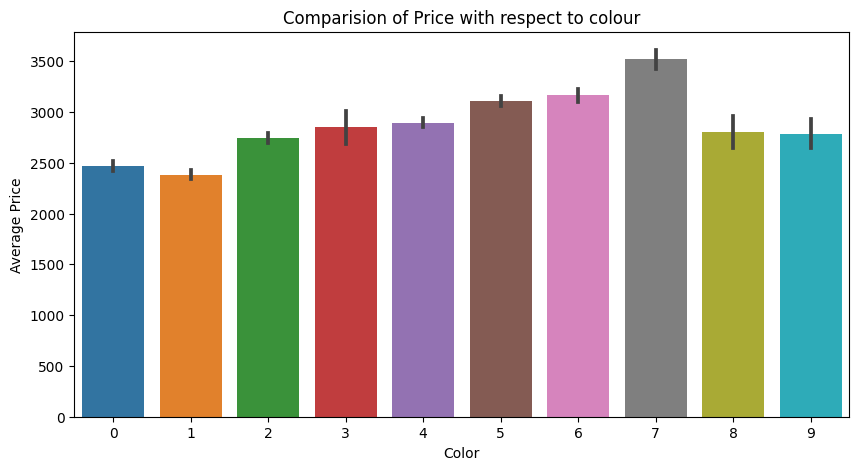

In [26]:
# Comparision of Price with respect to colour
plt.figure(figsize=(10, 5))
sns.barplot(x='color', y='price', data=diamonds)
plt.title('Comparision of Price with respect to colour')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

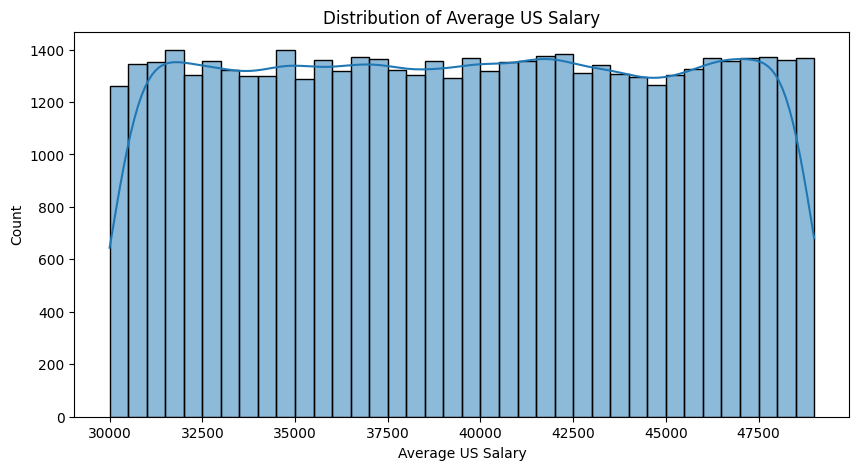

In [27]:
# Distribution of Average US Salary
plt.figure(figsize=(10, 5))
sns.histplot(diamonds['average us salary'], kde=True)
plt.title('Distribution of Average US Salary')
plt.xlabel('Average US Salary')
plt.show()

<Axes: >

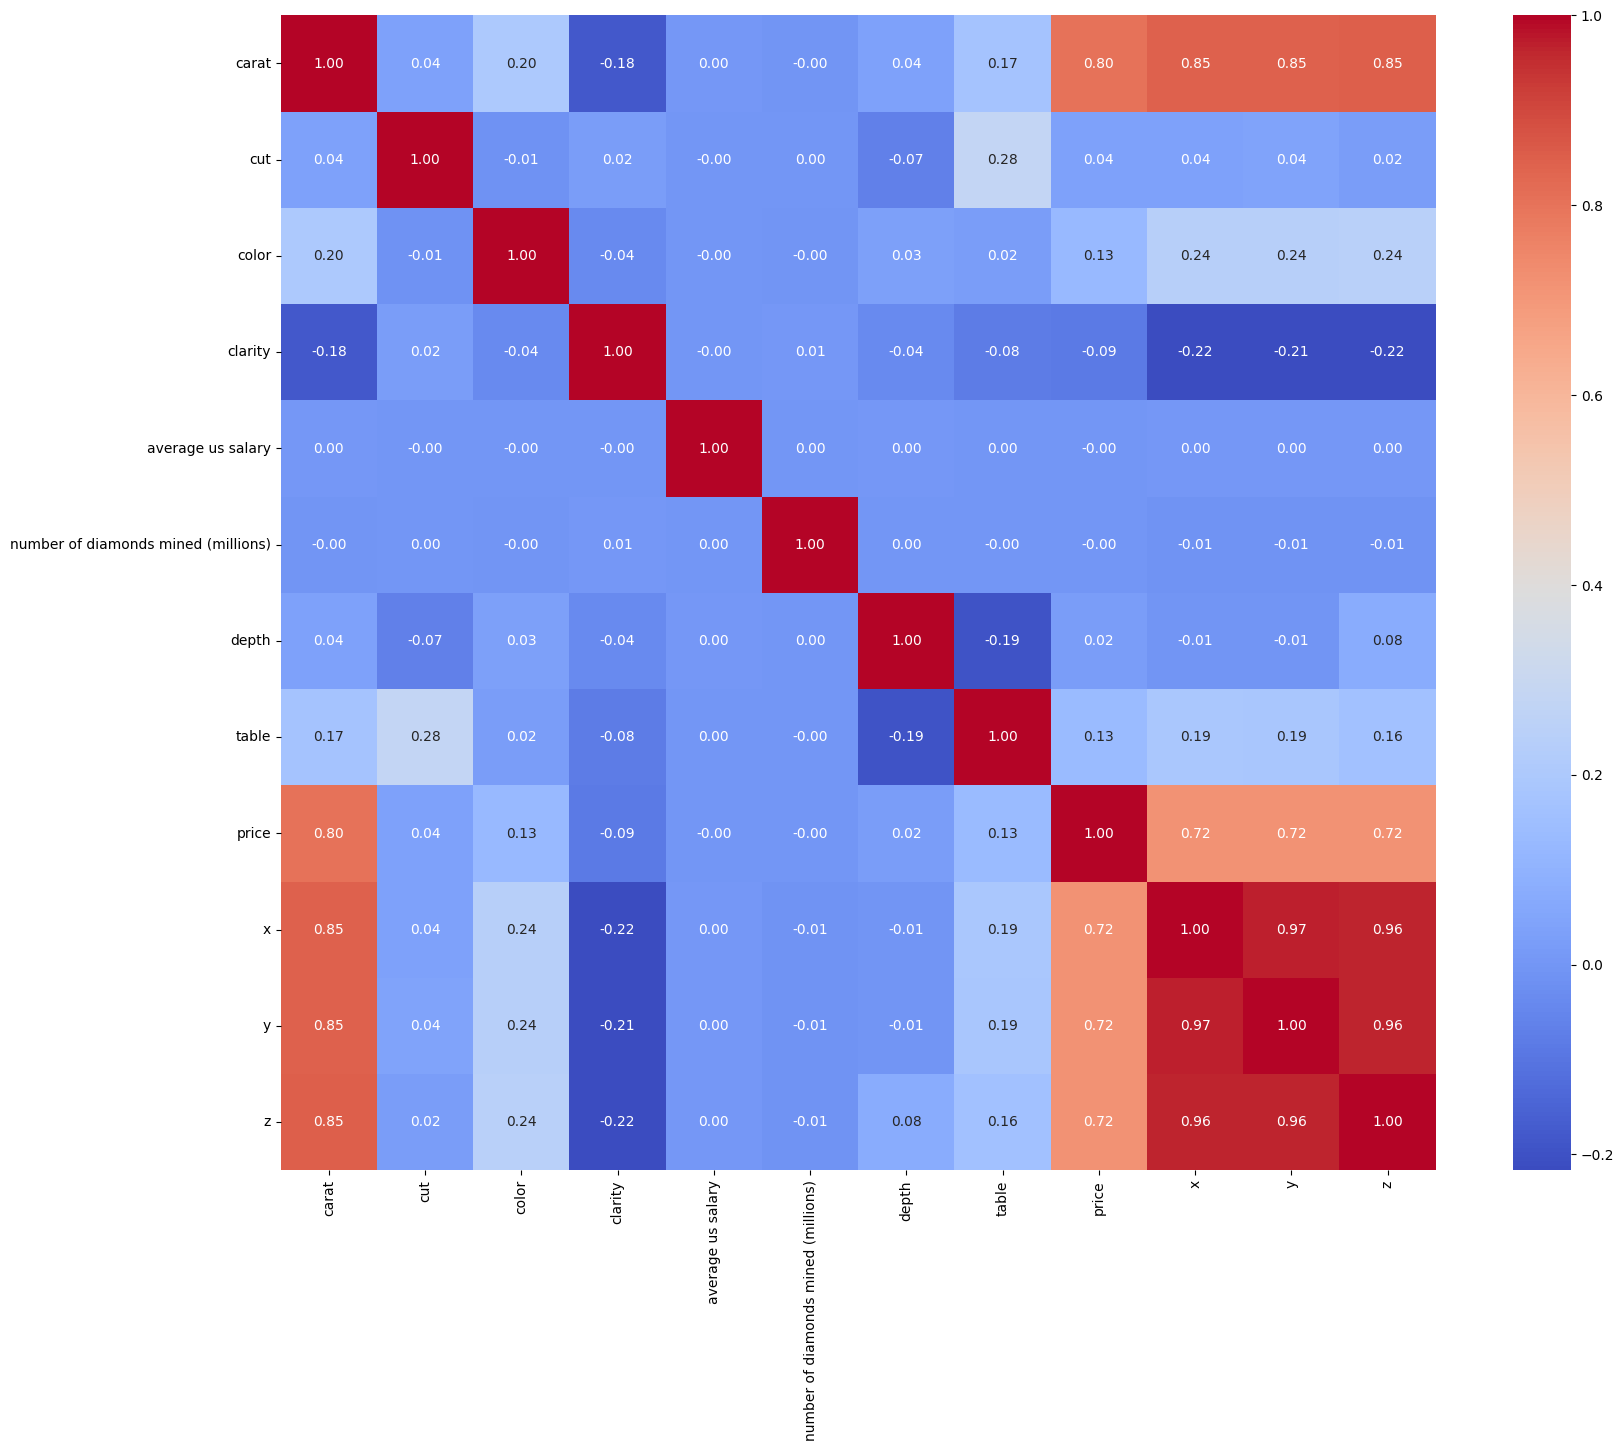

In [28]:
# Correlation Matrix

plt.figure(figsize=(20, 15))
correlation = diamonds.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)

In [29]:
# Saving preprocessed data
diamonds.to_csv("diamond_preprocessed.csv", index=False)